In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd

### For each observation in the training data it will produce an estimate using everything except the trees that saw that observation. You can fit it to the full data but still observe how the model generalizes. You don't need/want cross validation with Random Forests.

In [2]:
X = pd.read_csv("ENB2012_data.csv")
y1 = X.pop("Heating_Load")
y2 = X.pop("Cooling_Load")

In [3]:
X.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000


In [4]:
# initial model
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=20)
model.fit(X, y1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=20,
           verbose=0, warm_start=False)

In [5]:
y1_oob = model.oob_prediction_

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
model.feature_importances_

array([ 0.10875904,  0.44595696,  0.03632268,  0.27050139,  0.04775475,
        0.00073571,  0.07775714,  0.01221233])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  app.launch_new_instance()


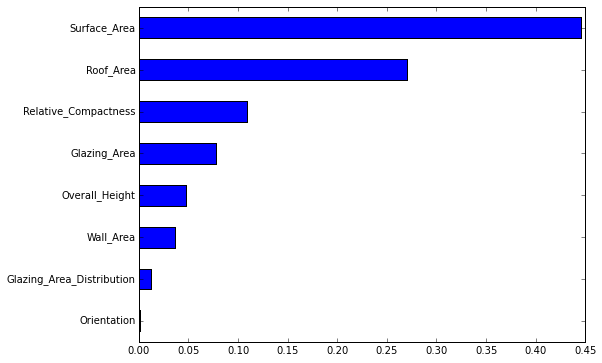

In [8]:
# simple version that shows all the variables
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(8,6))

In [9]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=20)
model.fit(X, y2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=20,
           verbose=0, warm_start=False)

In [10]:
model.feature_importances_

array([ 0.47531786,  0.12758216,  0.043794  ,  0.03543183,  0.24128973,
        0.01297214,  0.04724201,  0.01637026])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  app.launch_new_instance()


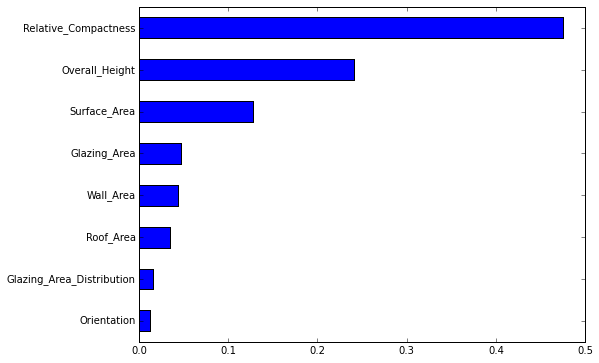

In [11]:
# simple version that shows all the variables
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(8,6))

# Plot Visualization

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from patsy import dmatrices
from sklearn import datasets, svm

In [13]:
df = pd.read_csv('ENB2012_data.csv')

In [14]:
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


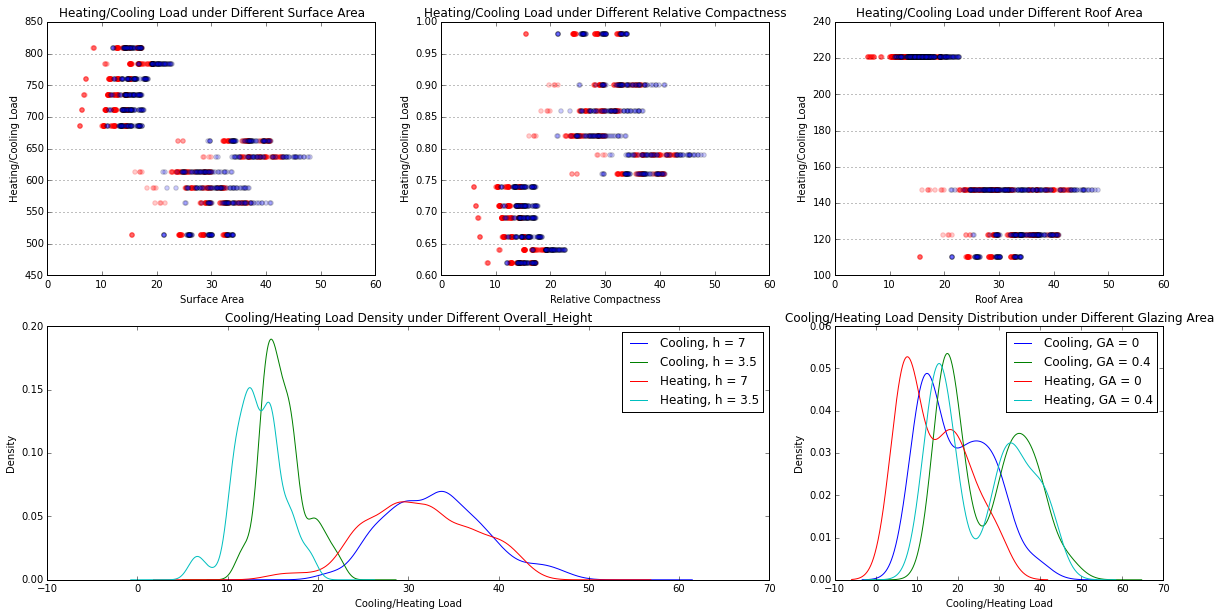

In [15]:
# set up graph parameters, dpi = dot per inch
fig = plt.figure(figsize=(20,10), dpi=1600)
alpha=alpha_scatterplot=0.2
alpha_bar_chart = 0.55

# Heating & Cooling
# graph 1
plt.subplot2grid((2,3), (0,0))   
plt.scatter(df.Heating_Load, df.Surface_Area, color='red', alpha=alpha_scatterplot) 
plt.scatter(df.Cooling_Load, df.Surface_Area, alpha=alpha_scatterplot) 
plt.ylabel("Heating/Cooling Load")
plt.xlabel("Surface Area")
plt.grid(b=True, which='major', axis='y')
plt.title("Heating/Cooling Load under Different Surface Area")

# graph 2
plt.subplot2grid((2,3), (0,1))   
plt.scatter(df.Heating_Load, df.Relative_Compactness, color='red', alpha=alpha_scatterplot) 
plt.scatter(df.Cooling_Load, df.Relative_Compactness, alpha=alpha_scatterplot) 
plt.ylabel("Heating/Cooling Load")
plt.xlabel("Relative Compactness")
plt.grid(b=True, which='major', axis='y')
plt.title("Heating/Cooling Load under Different Relative Compactness")

# graph 3
plt.subplot2grid((2,3), (0,2))   
plt.scatter(df.Heating_Load, df.Roof_Area, color='red', alpha=alpha_scatterplot) 
plt.scatter(df.Cooling_Load, df.Roof_Area, alpha=alpha_scatterplot) 
plt.ylabel("Heating/Cooling Load")
plt.xlabel("Roof Area")
plt.grid(b=True, which='major', axis='y')
plt.title("Heating/Cooling Load under Different Roof Area")

# graph 4
plt.subplot2grid((2,3),(1,0), colspan=2)
df.Cooling_Load[df.Overall_Height == 7].plot(kind='kde') # plot a kernel density est.
df.Cooling_Load[df.Overall_Height == 3.5].plot(kind='kde')
df.Heating_Load[df.Overall_Height == 7].plot(kind='kde') 
df.Heating_Load[df.Overall_Height == 3.5].plot(kind='kde')

plt.xlabel("Cooling/Heating Load")
plt.ylabel('Density')
plt.title("Cooling/Heating Load Density under Different Overall_Height")
plt.legend(('Cooling, h = 7', 'Cooling, h = 3.5', 'Heating, h = 7', 'Heating, h = 3.5'), loc='best')


# graph 5
plt.subplot2grid((2,3),(1,2), colspan=2)
df.Cooling_Load[df.Glazing_Area == 0].plot(kind='kde') # plot a kernel density est.
df.Cooling_Load[df.Glazing_Area == 0.4].plot(kind='kde')
df.Heating_Load[df.Glazing_Area == 0].plot(kind='kde') # plot a kernel density est.
df.Heating_Load[df.Glazing_Area == 0.4].plot(kind='kde')

plt.xlabel("Cooling/Heating Load")
plt.ylabel('Density')
plt.title("Cooling/Heating Load Density Distribution under Different Glazing Area")
plt.legend(('Cooling, GA = 0', 'Cooling, GA = 0.4', 'Heating, GA = 0', 'Heating, GA = 0.4'), loc='best')


## Parameter Optimization

### n_jobs

In [16]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X, y1)

1 loops, best of 3: 2.55 s per loop


In [17]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y1)

1 loops, best of 3: 1.99 s per loop


### n_estimator

In [18]:
from treeinterpreter import treeinterpreter as ti
import numpy as np

In [19]:
model = RandomForestRegressor()
model.fit(X, y1)
ds1 = X[300:400]
print np.mean(model.predict(ds1))

22.99707


In [20]:
instances = X[300:309]
prediction, bias, contributions = ti.predict(model, instances)
for i in range(len(instances)):
    print "Instance", i
    print "Bias (trainset mean)", bias[i]
    print "Feature contributions:"
    for c, feature in sorted(zip(contributions[i], 
                                 X.columns), 
                             key=lambda x: -abs(x[0])):
        print feature, round(c, 2)
    print "-"*20 

Instance 0
Bias (trainset mean) 22.3837734375
Feature contributions:
Roof_Area 3.64
Relative_Compactness -3.62
Surface_Area 1.76
Overall_Height 1.76
Glazing_Area_Distribution 1.06
Wall_Area -0.83
Glazing_Area 0.64
Orientation 0.05
--------------------
Instance 1
Bias (trainset mean) 22.3837734375
Feature contributions:
Roof_Area 3.64
Relative_Compactness -3.62
Surface_Area 1.76
Overall_Height 1.76
Glazing_Area_Distribution 1.06
Wall_Area -0.83
Glazing_Area 0.64
Orientation 0.31
--------------------
Instance 2
Bias (trainset mean) 22.3837734375
Feature contributions:
Roof_Area 3.64
Relative_Compactness -3.62
Surface_Area 1.76
Overall_Height 1.76
Glazing_Area_Distribution 1.06
Wall_Area -0.83
Glazing_Area 0.64
Orientation 0.15
--------------------
Instance 3
Bias (trainset mean) 22.3837734375
Feature contributions:
Roof_Area 3.64
Relative_Compactness -3.62
Surface_Area 1.76
Overall_Height 1.76
Glazing_Area_Distribution 1.06
Wall_Area -0.83
Glazing_Area 0.64
Orientation -0.38
------------

In [21]:
print prediction
print bias + np.sum(contributions, axis=1)

[ 26.84   27.098  26.939  26.411  38.776  39.726  39.74   39.098  36.776]
[ 26.84   27.098  26.939  26.411  38.776  39.726  39.74   39.098  36.776]


## Random Forest Regression

In [22]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

# shuffle and split training and test sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=.75,
                                                    random_state=0)
model = RandomForestRegressor(n_estimators=1000)
prediction = model.fit(X_train, y1_train)
score = prediction.score(X_test, y1_test)
print "Mean accuracy of Random Forest Predictions on the data was: {0}".format(score)

Mean accuracy of Random Forest Predictions on the data was: 0.992883087858
